In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df = pd.read_csv('Births2015.csv', index_col= [0], parse_dates = [0])

In [10]:
df.head()

,date,births,wday,year,month,day_of_year,day_of_month,day_of_week
1,2015-01-01,8068,Thu,2015,1,1,1,5
2,2015-01-02,10850,Fri,2015,1,2,2,6
3,2015-01-03,8328,Sat,2015,1,3,3,7
4,2015-01-04,7065,Sun,2015,1,4,4,1
5,2015-01-05,11892,Mon,2015,1,5,5,2


In [11]:
df_d = df.drop(['wday', 'year','day_of_year','day_of_month','day_of_week'], axis=1)

In [83]:
df_d['date'] = pd.to_datetime(df_d['date'])

In [12]:
print (df_d['date'].dtypes)

object


In [13]:
df_d.head()

,date,births,month
1,2015-01-01,8068,1
2,2015-01-02,10850,1
3,2015-01-03,8328,1
4,2015-01-04,7065,1
5,2015-01-05,11892,1


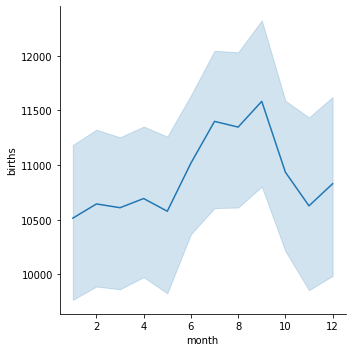

In [14]:
sns.relplot(x='month',y="births", data= df_d, kind ='line')

In [15]:
df_d.describe()

,births,month
count,365.000000,365.000000
mean,10899.991781,6.526027
std,2076.683881,3.452584
min,6515.000000,1.000000
25%,8431.000000,4.000000
50%,11883.000000,7.000000
75%,12339.000000,10.000000
max,13949.000000,12.000000


In [16]:
df_d_mean = df_d.rolling(window = 30).mean()

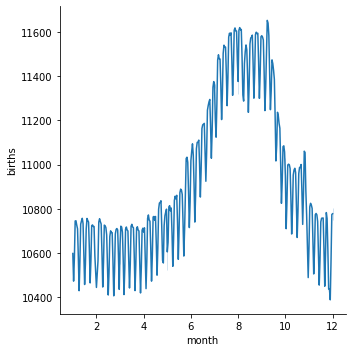

In [17]:
sns.relplot(x='month',y="births", data= df_d_mean, kind ='line')

In [19]:
value_series = df_d['births'].values
type(value_series)

numpy.ndarray

In [20]:
value  = pd.DataFrame(value_series)

In [21]:
birth_df = pd.concat([value,value.shift(1)],axis=1)

In [22]:
birth_df.head()

,0,0
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [29]:
birth_df.columns = ['Actual_Birth','Forecast_birth']

In [30]:
birth_df.head()

,Actual_Birth,Forecast_birth
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [31]:
birth_test = birth_df[1:]

In [32]:
birth_test.head()

,Actual_Birth,Forecast_birth
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0


In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np 

In [33]:
birth_error =  mean_squared_error(birth_test.Actual_Birth, birth_test.Forecast_birth)

In [34]:
birth_error

5162403.576923077

In [35]:
np.sqrt(birth_error)

2272.092334594498